Question 6: Implementing a Custom Cross-Validation Loop<br>
Task: Write a custom cross-validation loop for a Support Vector Machine model with varying 'C' parameter and plot the results.

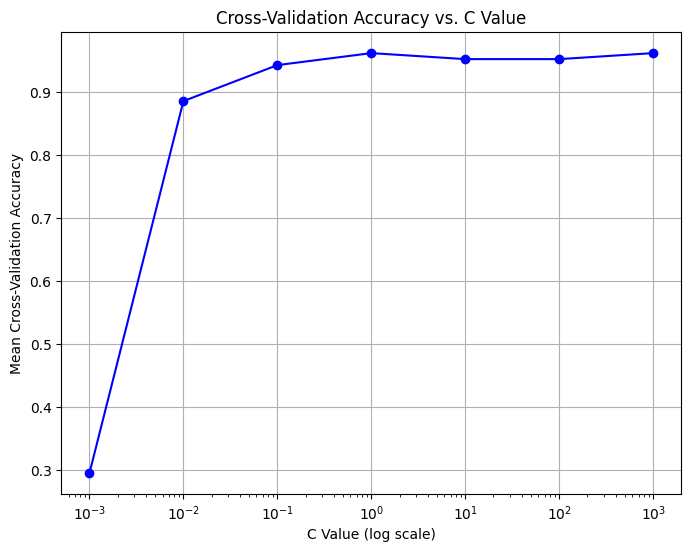

Test Set Accuracy with C=1.0: 1.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Task: Write a custom cross-validation loop for a Support Vector Machine model with varying 'C' parameter and plot the results.

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Values for 'C' to test (from small to large)
C_values = np.logspace(-3, 3, 7)  # From 0.001 to 1000

# List to store mean cross-validation accuracies
cv_accuracies = []

# Custom cross-validation loop
for C in C_values:
    # Initialize the SVM model with the current 'C' value
    svm_model = SVC(C=C, kernel='linear', random_state=42)
            
    # Split the training set into 5 folds manually for cross-validation
    fold_accuracies = []
    for fold in range(5):
        # Split data into train and validation sets (using a simple split)
        fold_size = len(X_train) // 5
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size
                                         
        X_train_fold = np.concatenate([X_train[:val_start], X_train[val_end:]])
        y_train_fold = np.concatenate([y_train[:val_start], y_train[val_end:]])
        X_val_fold = X_train[val_start:val_end]
        y_val_fold = y_train[val_start:val_end]

        # Fit the model on the training fold
        svm_model.fit(X_train_fold, y_train_fold)

        # Make predictions and compute accuracy on the validation fold
        y_val_pred = svm_model.predict(X_val_fold)
        fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
        fold_accuracies.append(fold_accuracy)   

    # Calculate the mean accuracy for this 'C' value across all folds
    mean_accuracy = np.mean(fold_accuracies)
    cv_accuracies.append(mean_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(C_values, cv_accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.title('Cross-Validation Accuracy vs. C Value')
plt.xlabel('C Value (log scale)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Optionally, evaluate the model with the best 'C' on the test set
best_C = C_values[np.argmax(cv_accuracies)]
best_svm_model = SVC(C=best_C, kernel='linear', random_state=42)
best_svm_model.fit(X_train, y_train)
y_test_pred = best_svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy with C={best_C}: {test_accuracy:.2f}")
    

